# Tumor Biomarkers: One Sig DE Gene
For samples with sufficient sample size

In [1]:
# Set autoreload module for dev
%load_ext autoreload
%autoreload 2
%aimport rnaseq_lib


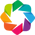

In [2]:
from collections import defaultdict
import pandas as pd
import rnaseq_lib as r
import numpy as np

import holoviews as hv
hv.extension('bokeh')

In [3]:
# TCGA and GTEx expression and metadata dataframe
df_path = '/mnt/rnaseq-cancer/Objects/tcga-gtex-metadata-expression.tsv'
df = pd.read_csv(df_path, sep='\t', index_col=0, dtype=r.tissues.dtype)

In [4]:
# Holoviews plot object
h = r.plot.Holoview(df)

In [5]:
# Read in de table
de = pd.read_csv('de-table.tsv', sep='\t', index_col=0, header=[0, 1])

In [ ]:
# Filter genes for l2fc
candidates = []   # only one DE tissue
# Filter parameters tuned to get top 50
l2_filter = 2
norm_filter = 5
exp_filter = 8
# Plot values
x, y = [], []
for gene, row in de.iterrows():
    l2fcs = [row[x, 'l2fc_gtex'] for x in h.tissues]
    if len(filter(lambda x: x > l2_filter, l2fcs)) == 1:
        tissue = h.tissues[np.argmax(l2fcs)]
        exp_gtex = [row[x, 'exp_gtex'] for x in h.tissues]
        if row[tissue, 'exp_gtex'] < norm_filter and row[tissue, 'exp_tumor'] > exp_filter:
            candidates.append(gene)        

In [ ]:
def extract_feature(feature):
    df = pd.DataFrame()
    df['value'] = r.utils.flatten([de[x, feature].tolist() for x in h.tissues])
    df['gene'] = r.utils.flatten([de[x, feature].index.tolist() for x in h.tissues])
    df['tissue'] = [t for _ in de.index for t in h.tissues]
    return df

In [ ]:
# Sort candidates by l2fc
l2 = extract_feature('l2fc_gtex')
candidates = l2[l2.gene.isin(candidates)].sort_values('value', ascending=False).gene

## Sample Counts

In [9]:
%%opts Bars [xrotation=80]
h.sample_counts()

:Bars   [Tissue,Label]   (Count)

## Top 10

In [10]:
%%opts Overlay [tabs=True]
dists = [h.gene_distribution(g).relabel(g) for g in candidates[:10]]
hv.Overlay(dists)

:Overlay
   .BoxWhisker.NANOG    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.DPCR1    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.ARHGAP36 :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.KHDC3L   :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.MAGEA12  :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.SLC6A3   :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.DPPA3    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.DPPA5    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.KIF1A    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.SCGB3A2  :BoxWhisker   [Tissue,Dataset]   (Gene Expression)

## Top 20

In [11]:
%%opts Overlay [tabs=True]
dists = [h.gene_distribution(g).relabel(g) for g in candidates[10:20]]
hv.Overlay(dists)

:Overlay
   .BoxWhisker.UPK1B                :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.GIP                  :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.LIM2                 :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.NANOGP8              :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.DNMT3L               :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.PRDM14               :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.ZSCAN10              :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.TDRD1                :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.LY6G6D               :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.AL662899_full_stop_2 :BoxWhisker   [Tissue,Dataset]   (Gene Expression)

## Top 30

In [12]:
%%opts Overlay [tabs=True]
dists = [h.gene_distribution(g).relabel(g) for g in candidates[20:30]]
hv.Overlay(dists)

:Overlay
   .BoxWhisker.BPIFA1   :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.NLRP9    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.NDNF     :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.GFRA3    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.THRSP    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.CYP2C9   :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.C10orf90 :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.ABHD12B  :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.CLCA2    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.GRIN2B   :BoxWhisker   [Tissue,Dataset]   (Gene Expression)

## Top 40

In [13]:
%%opts Overlay [tabs=True]
dists = [h.gene_distribution(g).relabel(g) for g in candidates[30:40]]
hv.Overlay(dists)

:Overlay
   .BoxWhisker.ROPN1    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.ACSL6    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.OTX2     :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.KRT14    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.C21orf62 :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.KCNC3    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.PTGER2   :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.TPRG1    :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.HSD11B1  :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.SAMD14   :BoxWhisker   [Tissue,Dataset]   (Gene Expression)

## Top 50

In [14]:
%%opts Overlay [tabs=True]
dists = [h.gene_distribution(g).relabel(g) for g in candidates[40:50]]
hv.Overlay(dists)

:Overlay
   .BoxWhisker.ENSG00000250588 :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.ZNF716          :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.FAM83C          :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.HHIPL1          :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.TEKT2           :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.RGS17           :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.IRX4            :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.APOB            :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.C14orf37        :BoxWhisker   [Tissue,Dataset]   (Gene Expression)
   .BoxWhisker.P2RX6           :BoxWhisker   [Tissue,Dataset]   (Gene Expression)